In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
import pandas.util.testing as tm

In [32]:
Data = pd.read_csv('city_day.csv')
Data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Amaravati,25-11-17,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
1,Amaravati,26-11-17,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
2,Amaravati,27-11-17,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
3,Amaravati,28-11-17,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
4,Amaravati,29-11-17,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate


In [5]:
Data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1559,Delhi,01-01-15,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
1560,Delhi,02-01-15,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
1561,Delhi,03-01-15,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
1562,Delhi,04-01-15,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
1563,Delhi,05-01-15,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [6]:
Data.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2778,Delhi,27-06-20,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
2779,Delhi,28-06-20,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
2780,Delhi,29-06-20,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
2781,Delhi,30-06-20,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate
2782,Delhi,01-07-20,54.01,128.66,6.33,21.05,16.81,29.06,0.97,11.15,29.73,2.03,23.57,0.65,101.0,Moderate


In [7]:
Data.shape

(1224, 16)

In [8]:
Data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000
mean,117.134755,223.165678,33.265458,44.428742,54.032925,41.529518,2.185964,13.948154,44.382949,3.669469,21.834600,1.442696,251.832516
std,80.883996,117.172024,26.401221,16.902077,32.534856,17.434102,2.627594,5.154533,17.646233,2.329412,17.008215,2.380415,115.287698
min,10.240000,19.510000,4.420000,13.430000,1.870000,6.780000,0.190000,2.650000,6.940000,0.220000,1.270000,0.000000,51.000000
25%,57.792500,132.662500,14.095000,30.997500,29.747500,30.980000,0.980000,10.195000,31.910000,1.960000,8.980000,0.110000,153.000000
50%,95.720000,203.710000,24.340000,42.895000,47.080000,37.350000,1.290000,13.260000,41.100000,3.030000,18.670000,0.650000,246.500000
75%,156.372500,293.820000,42.752500,55.730000,70.615000,47.942500,1.930000,17.210000,53.440000,4.745000,28.845000,1.970000,336.500000
max,639.190000,796.880000,158.630000,106.040000,195.810000,166.700000,16.230000,40.750000,136.670000,20.640000,103.000000,23.300000,677.000000


In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 1559 to 2782
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        1224 non-null   object 
 1   Date        1224 non-null   object 
 2   PM2.5       1224 non-null   float64
 3   PM10        1224 non-null   float64
 4   NO          1224 non-null   float64
 5   NO2         1224 non-null   float64
 6   NOx         1224 non-null   float64
 7   NH3         1224 non-null   float64
 8   CO          1224 non-null   float64
 9   SO2         1224 non-null   float64
 10  O3          1224 non-null   float64
 11  Benzene     1224 non-null   float64
 12  Toluene     1224 non-null   float64
 13  Xylene      1224 non-null   float64
 14  AQI         1224 non-null   float64
 15  AQI_Bucket  1224 non-null   object 
dtypes: float64(13), object(3)
memory usage: 162.6+ KB


In [10]:
Data.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [11]:
DataCleaned = Data.dropna()
DataCleaned.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [12]:
ModeValueForColor = Data['AQI'].mode()[0]
print('mode value for AQI column is: ',ModeValueForColor)

mode value for AQI column is:  340.0


In [13]:
print(Data.isnull().sum())
print(Data.info())

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 1559 to 2782
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        1224 non-null   object 
 1   Date        1224 non-null   object 
 2   PM2.5       1224 non-null   float64
 3   PM10        1224 non-null   float64
 4   NO          1224 non-null   float64
 5   NO2         1224 non-null   float64
 6   NOx         1224 non-null   float64
 7   NH3         1224 non-null   float64
 8   CO          1224 non-null   float64
 9   SO2         1224 non-null   float64
 10  O3          1224 non-null   float64
 11  Benzene     1224 non-null   float64
 12  Toluene     1224 non-null   float64
 13  X

In [14]:
Data['AQI'].value_counts()

340.0    10
123.0     9
104.0     8
315.0     8
105.0     8
         ..
346.0     1
462.0     1
506.0     1
522.0     1
219.0     1
Name: AQI, Length: 394, dtype: int64

In [15]:
Data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [16]:
Data.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [1]:
# l=[]
# for i in range(len(Data.columns)):
#     f=Data.columns[i]
#     count=0
#     for j in range(len(Data[f])):
#         if Data[f][j]==-200:
#             count+=1
#     l.append((f,count))
# print("Values from each column that needs to be replaced with avg: \n",l)

In [18]:
num=Data._get_numeric_data()
num[num<0]=0
Data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1559,Delhi,01-01-15,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
1560,Delhi,02-01-15,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
1561,Delhi,03-01-15,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
1562,Delhi,04-01-15,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
1563,Delhi,05-01-15,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,Delhi,27-06-20,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate
2779,Delhi,28-06-20,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate
2780,Delhi,29-06-20,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor
2781,Delhi,30-06-20,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate


In [19]:
Data['AQI'].value_counts()

340.0    10
123.0     9
104.0     8
315.0     8
105.0     8
         ..
346.0     1
462.0     1
506.0     1
522.0     1
219.0     1
Name: AQI, Length: 394, dtype: int64

1559    472.0
1560    454.0
1561    143.0
1562    319.0
1563    325.0
        ...  
2778    112.0
2779    196.0
2780    233.0
2781    114.0
2782    101.0
Name: AQI, Length: 1224, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

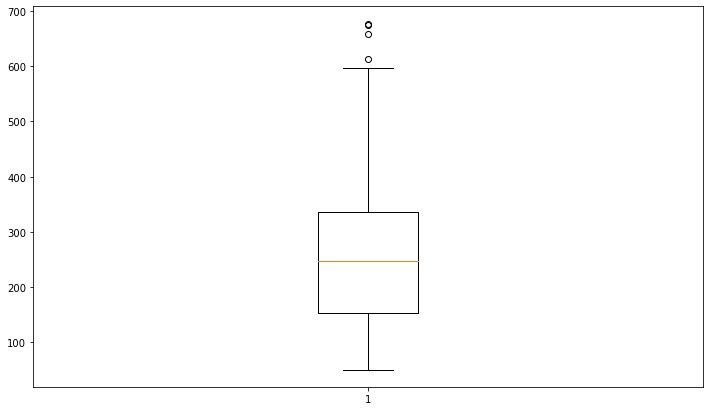

In [20]:
#creating dataset

np.random.seed(10)
data = Data["AQI"]
print(data)
fig = plt.figure(figsize=(12,7))

#creating plot
plt.boxplot(data)
plt.show

In [22]:
!pip install pandas_visual_analysis

In [23]:
from pandas_visual_analysis import VisualAnalysis
VisualAnalysis(Data)

In [24]:
from pandas_visual_analysis import VisualAnalysis
VisualAnalysis(Data)

In [25]:
from pandas_visual_analysis import VisualAnalysis
VisualAnalysis(Data)

In [26]:
Data.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.896995,0.700900,0.724964,0.642663,0.582988,0.216142,0.374498,0.265574,0.707624,0.365376,0.172972,0.913065
PM10,0.896995,1.000000,0.692950,0.752455,0.681159,0.502248,0.140963,0.426987,0.376617,0.716163,0.379758,0.169729,0.902957
NO,0.700900,0.692950,1.000000,0.816339,0.870664,0.391687,0.066400,0.462003,0.230965,0.817680,0.652961,0.196161,0.660215
NO2,0.724964,0.752455,0.816339,1.000000,0.815732,0.426998,0.023636,0.596936,0.459307,0.743737,0.447055,0.129506,0.720383
NOx,0.642663,0.681159,0.870664,0.815732,1.000000,0.332920,0.123729,0.407902,0.316134,0.789090,0.574924,0.240797,0.650419
NH3,0.582988,0.502248,0.391687,0.426998,0.332920,1.000000,0.379968,0.032231,0.105099,0.421566,0.065235,0.158931,0.534854
CO,0.216142,0.140963,0.066400,0.023636,0.123729,0.379968,1.000000,-0.223363,-0.117226,0.223118,-0.095413,0.500493,0.324491
SO2,0.374498,0.426987,0.462003,0.596936,0.407902,0.032231,-0.223363,1.000000,0.563872,0.375361,0.249949,-0.084384,0.369670
O3,0.265574,0.376617,0.230965,0.459307,0.316134,0.105099,-0.117226,0.563872,1.000000,0.199693,-0.131529,0.002992,0.324566
Benzene,0.707624,0.716163,0.817680,0.743737,0.789090,0.421566,0.223118,0.375361,0.199693,1.000000,0.660817,0.342742,0.698230


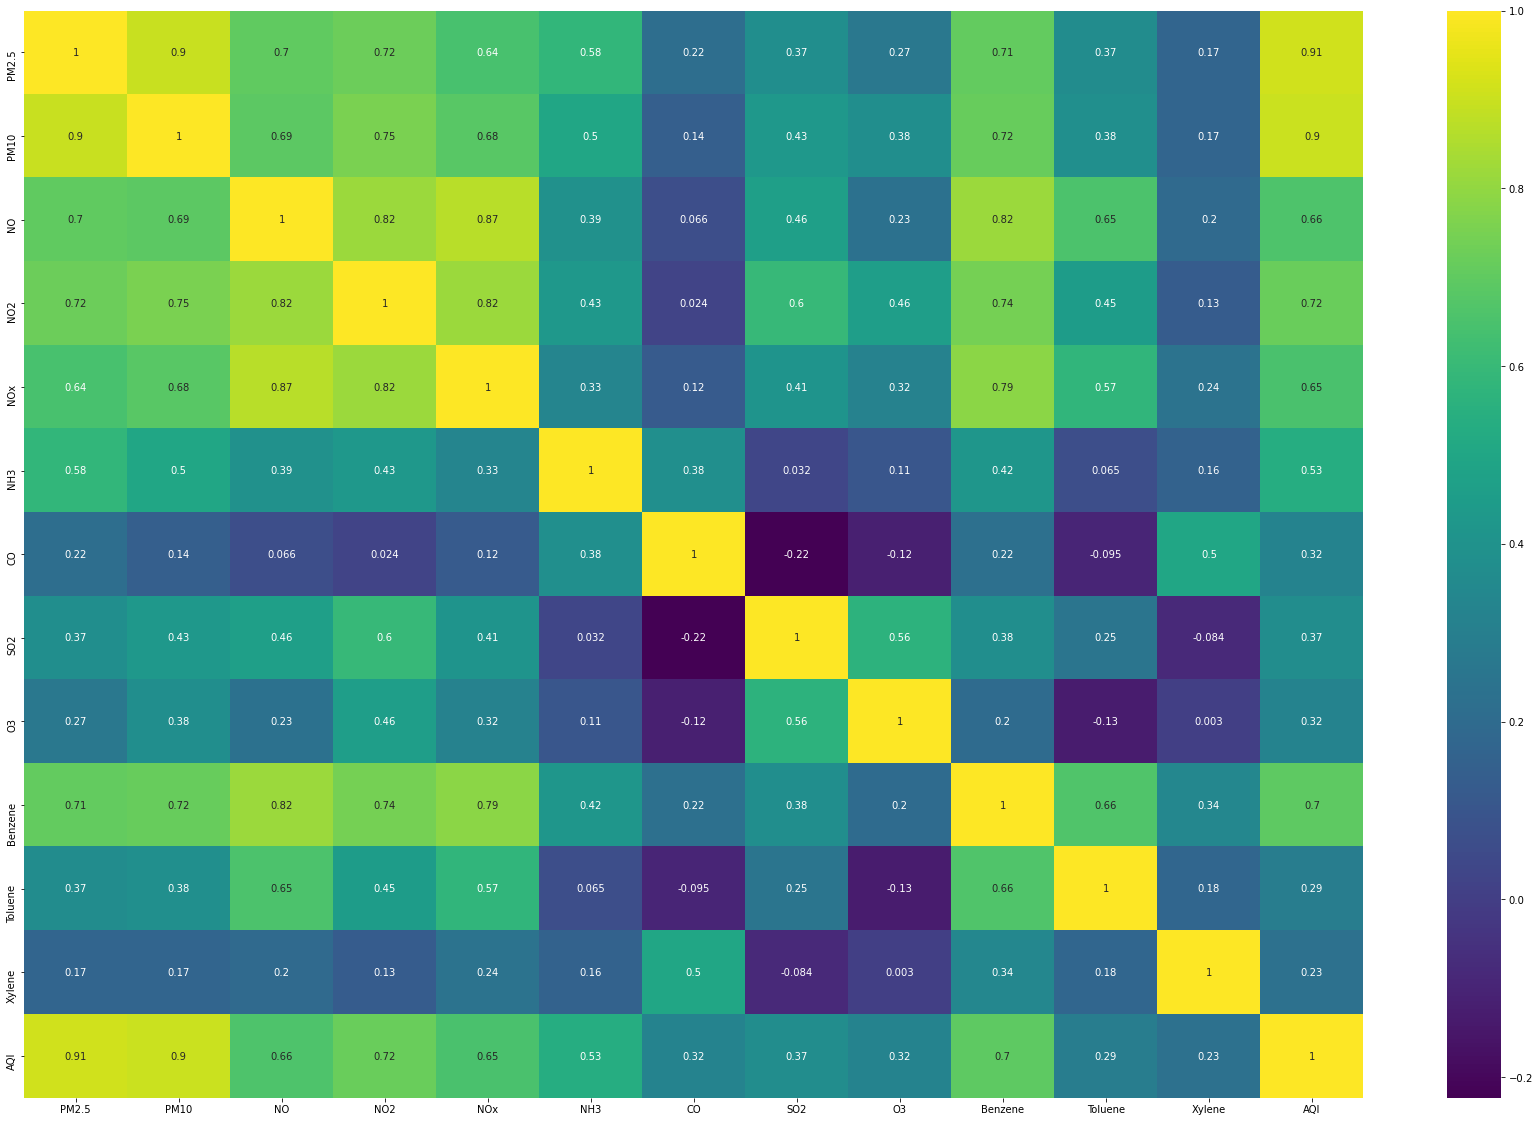

In [27]:
corrmat=Data.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(30,20))
g=sns.heatmap(Data[top_corr_feature].corr(),annot=True,cmap='viridis')

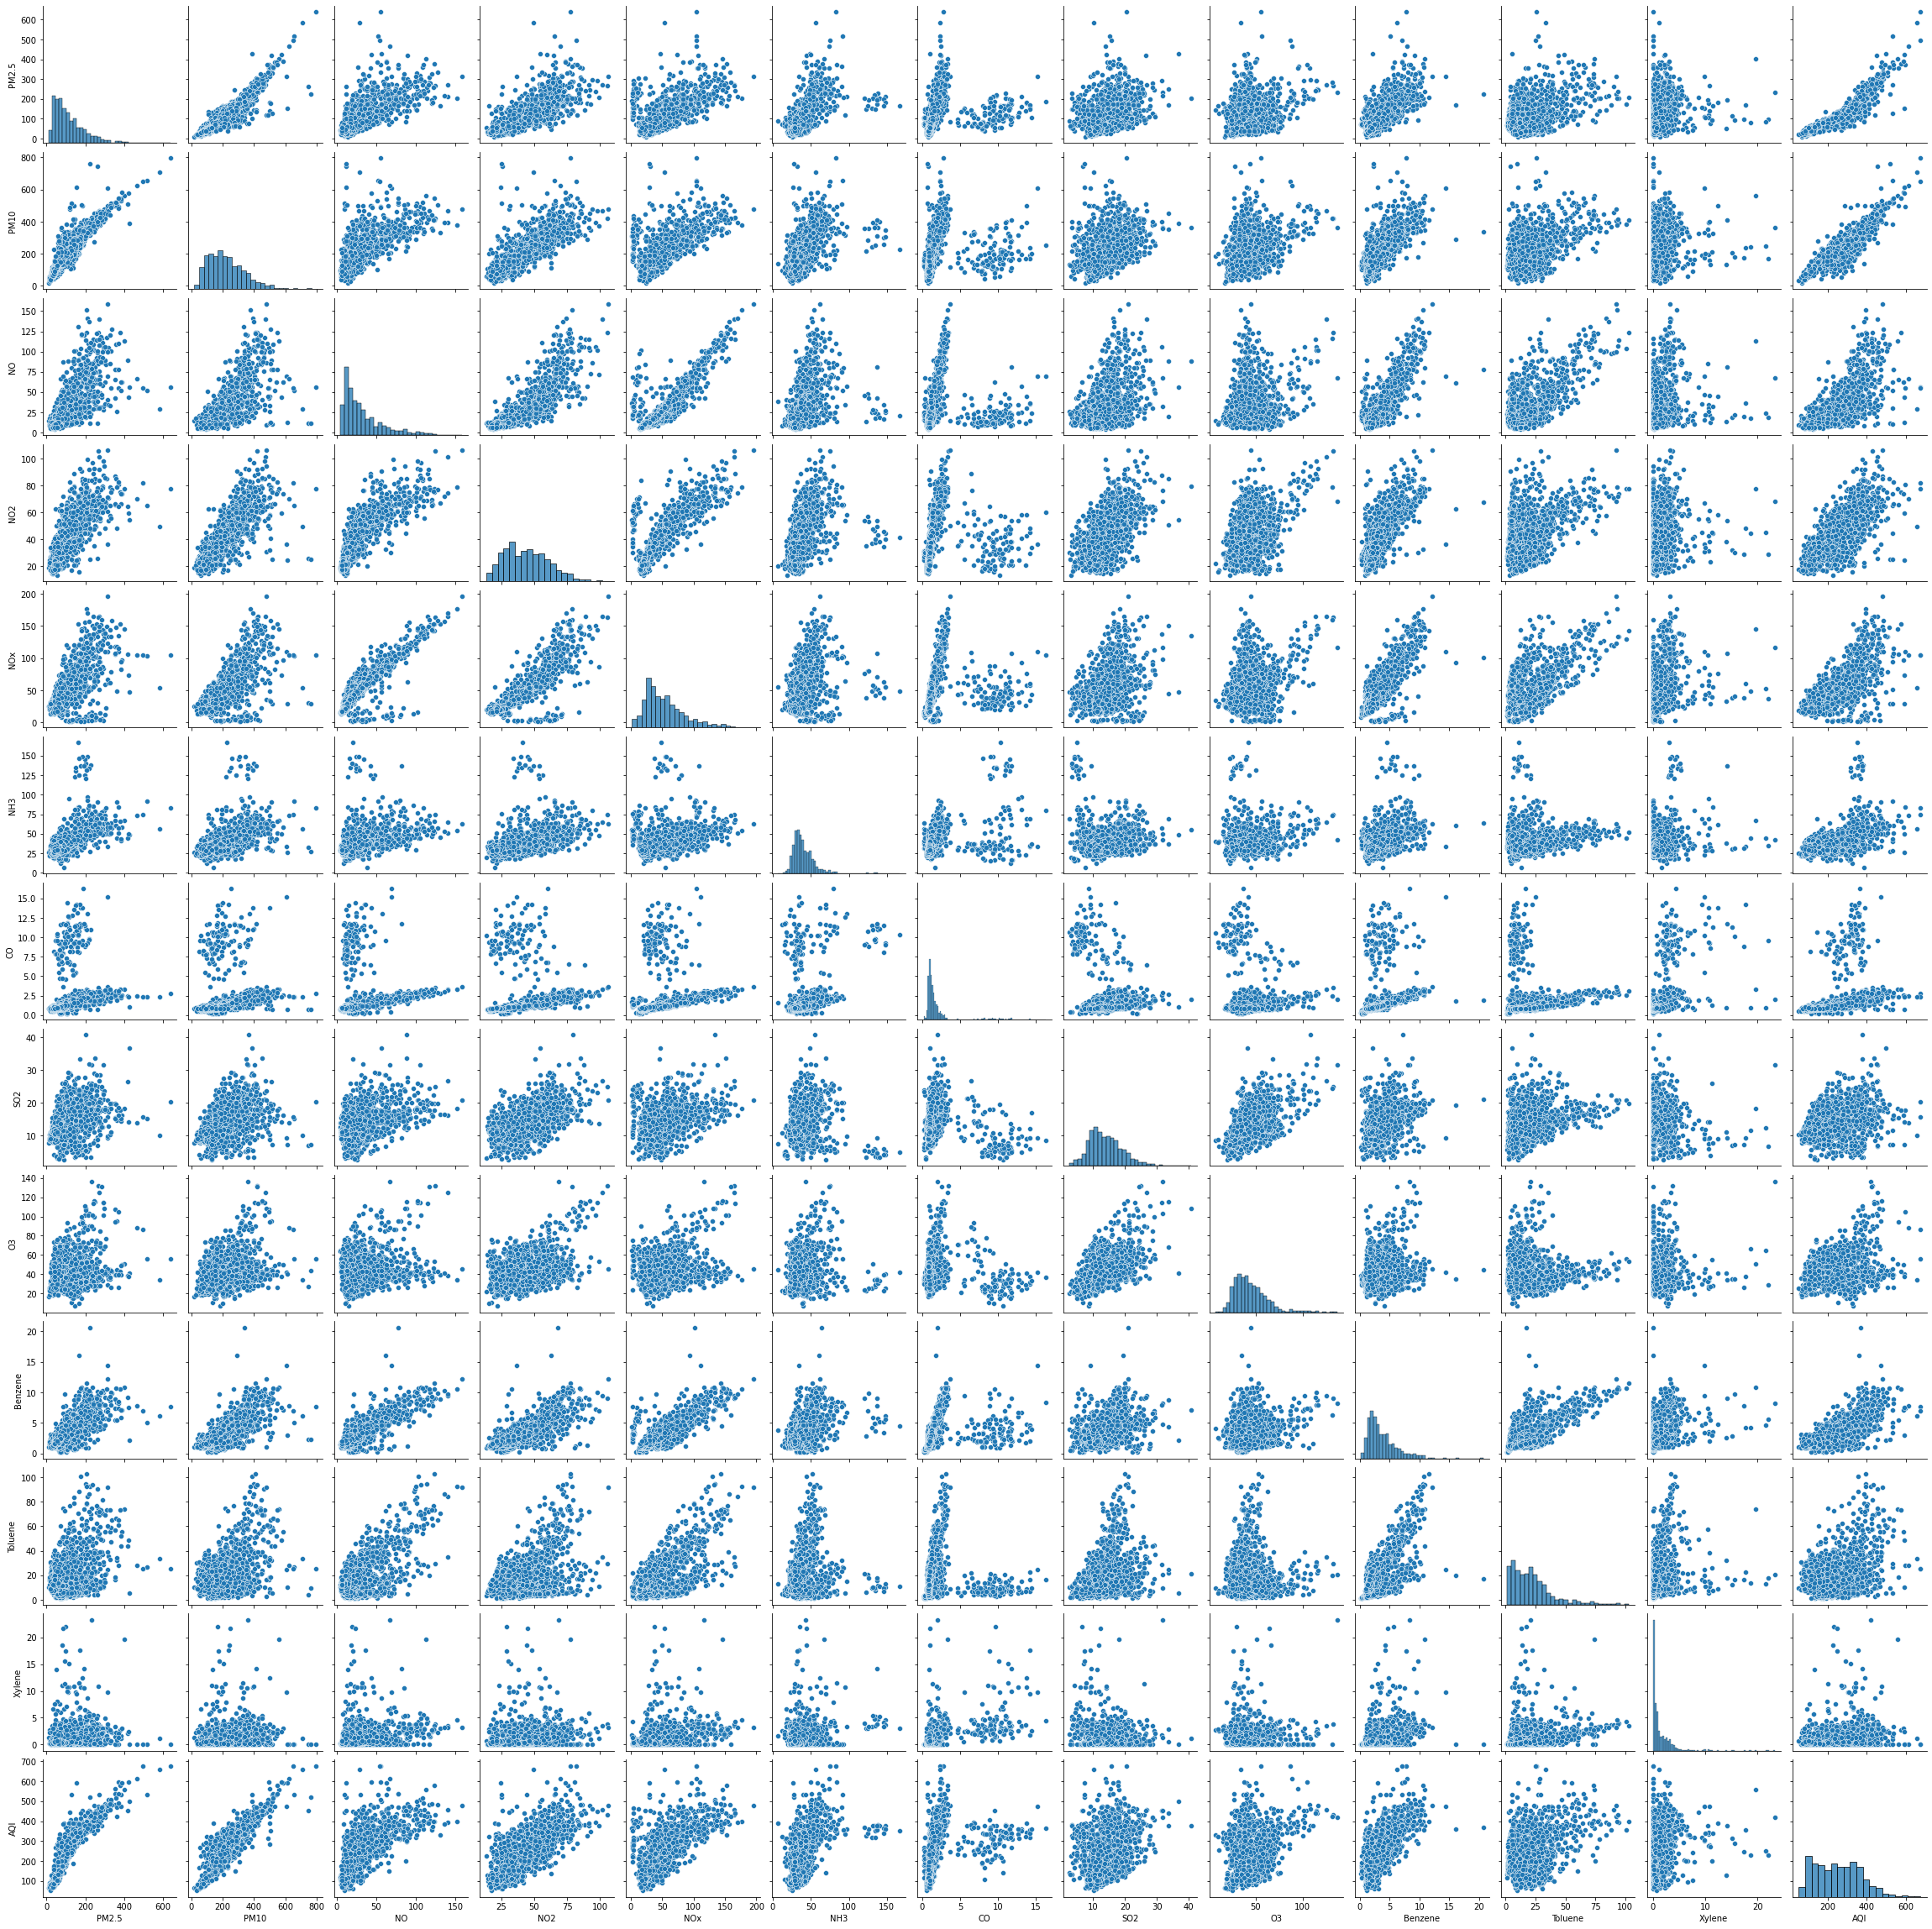

In [28]:
sns.pairplot(Data)

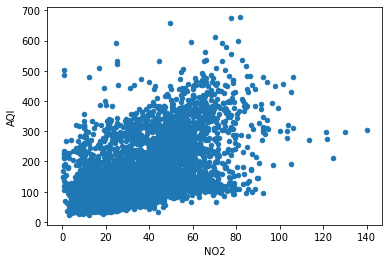

In [25]:
Data.plot(kind='scatter', x="NO2", y="AQI")
plt.show()

<AxesSubplot:ylabel='Frequency'>

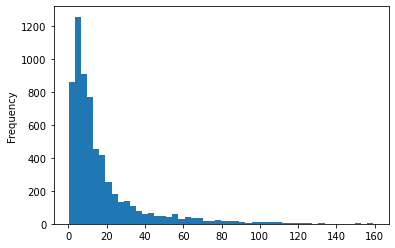

In [26]:
Data["NO"].plot.hist(bins=50)

In [27]:
#Prediction

In [28]:
feature=Data
feature=feature.drop("City",axis=1)
feature=feature.drop("Date",axis=1)
feature=feature.drop("AQI_Bucket",axis=1)
feature=feature.drop("AQI",axis=1)

In [29]:
feature.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06
1,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08
2,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12
3,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07
4,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08


In [30]:
label = Data["AQI"]

In [31]:
label.head()

0    184
1    197
2    198
3    188
4    173
Name: AQI, dtype: int64

In [32]:
#train and test
X_train,X_test,y_train, y_test = train_test_split(feature,label,test_size=.3)

In [33]:
print(X_train.shape,y_train.shape)

(4365, 12) (4365,)


In [34]:
print(X_test.shape,y_test.shape)

(1871, 12) (1871,)


In [35]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
lr.score(X_test,y_test)

0.9092896848910398

In [37]:
y_pred = lr.predict(X_test)
y_pred

array([ 85.36387386, 109.61642935, 184.41883579, ...,  68.59481303,
       284.21220943, 117.47634727])

In [38]:
print(lr.coef_)

[ 0.83477792  0.39848299 -0.03959532 -0.14634373  0.37763716  0.0297234
  7.54288257  0.10793067  0.3103525  -0.24101956 -0.16325746 -0.23948981]


In [39]:
print(mean_squared_error(y_test,y_pred))

782.9699997863374


In [40]:
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficient of determination: 0.91


In [41]:
print('R squared value: %.2f' % r2_score(y_test, y_pred))

R squared value: 0.91


In [ ]:
y_test.plot()

In [ ]:
y_pred.plot()